![visioncolab](https://drive.google.com/uc?export=view&id=10UMKqKSnU2grmitxYxvL7V6GVMu8RrpP)


`Google colab's for image processing, pattern recognition and computer vision`

[Domingo Mery](https://domingomery.ing.puc.cl/) - Department of Computer Science - Universidad Católica de Chile

# Introduction Example for Color Segmentation

Rice Segmentation

# Libraries

In [ ]:
import numpy as np
from  cv2 import imread
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# How is the image?

In [ ]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

# Reading the color image

In [ ]:
!wget https://www.dropbox.com/s/jetlnfihles3g7k/flowers.jpg

--2025-08-27 23:04:47--  https://www.dropbox.com/s/jetlnfihles3g7k/flowers.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/1g1uwdstwgsmjn3qeutvm/flowers.jpg?rlkey=bb1ogn8l3ke99uculmsduiw6j [following]
--2025-08-27 23:04:48--  https://www.dropbox.com/scl/fi/1g1uwdstwgsmjn3qeutvm/flowers.jpg?rlkey=bb1ogn8l3ke99uculmsduiw6j
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9028f58393160d324a4d60f2a4.dl.dropboxusercontent.com/cd/0/inline/CwMNu_Ppu-Y5B1nwdcIiizC-dCTOd_GuRosDOGJ1rq9oGok0y-eke8zJLX1L8NscEUtsfdv3v9ctdolFNTeCwDDxpXAbrp1n_3aR3GpXhpTuxjrvVHr8d6eV0sLkIR3TID4/file# [following]
--2025-08-27 23:04:48--  https://uc9028f58393160d324a4d60f2a4.dl.dropboxusercontent.com/cd/0/inline/CwMNu_Ppu-Y5B1nwdcIiiz

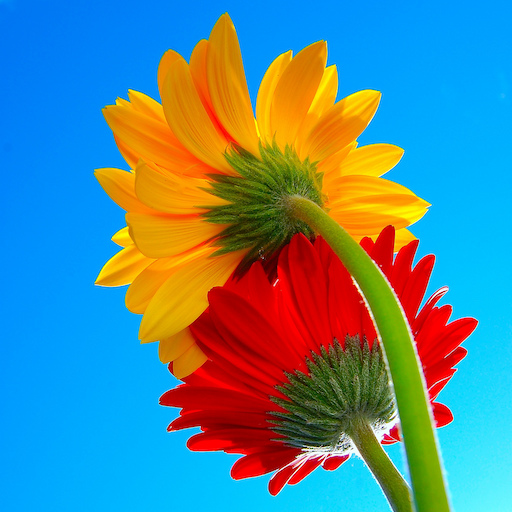

size =  (512, 512, 3)
max  =  255
min  =  0


In [ ]:
Icv = imread('flowers.jpg')      # opencv format (BGR)
cv2_imshow(Icv)
howis(Icv)

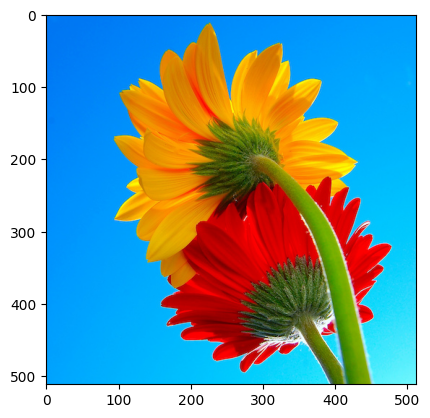

In [ ]:
I = Icv[:,:,[2,1,0]]             # BGR to RGB conversion
plt.imshow(I)
plt.show()

# Color channels

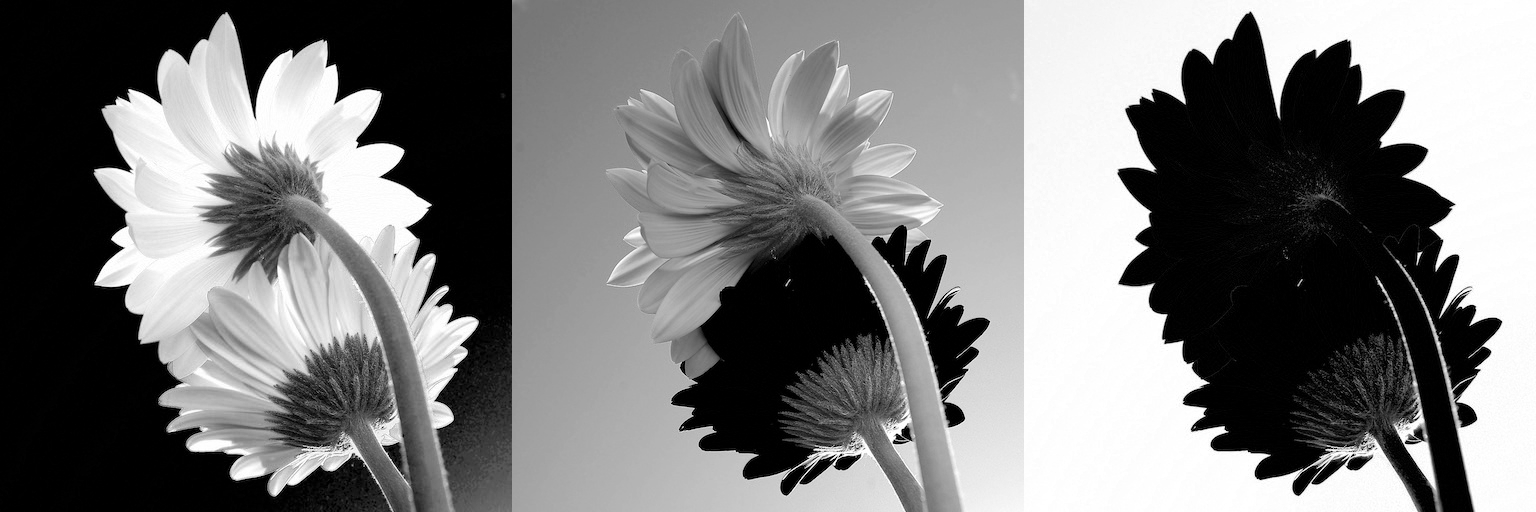

In [ ]:
R = I[:,:,0]
G = I[:,:,1]
B = I[:,:,2]
RGB = np.concatenate((R,G,B),axis=1)
cv2_imshow(RGB)

# Conversion a blanco y negro (tonos de gris)

size =  (512, 512)
max  =  255
min  =  0


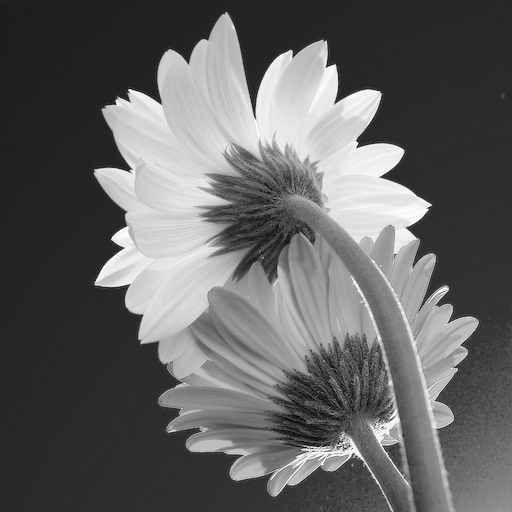

In [ ]:
Rd = R.astype(float)
Gd = G.astype(float)
Bd = B.astype(float)
# weighted average
#k  = (1/3,1/3,1/3)
k  = (0.75,0.25,0)
Zd = k[0]*Rd+k[1]*Gd+k[2]*Bd
Z  = Zd.astype(int)
howis(Z)
cv2_imshow(Z)

# Histogram

In [ ]:
def imhist(X):
  (N,M) = X.shape
  n = 256
  h = np.zeros((256,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  plt.plot(range(n),h[0:n])
  plt.show()


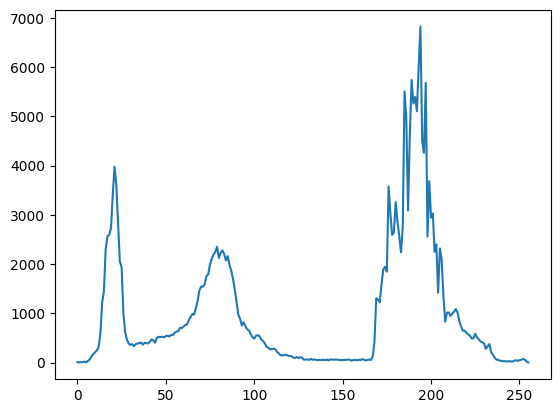

In [ ]:
imhist(Z)

# Segmentation of the red flower

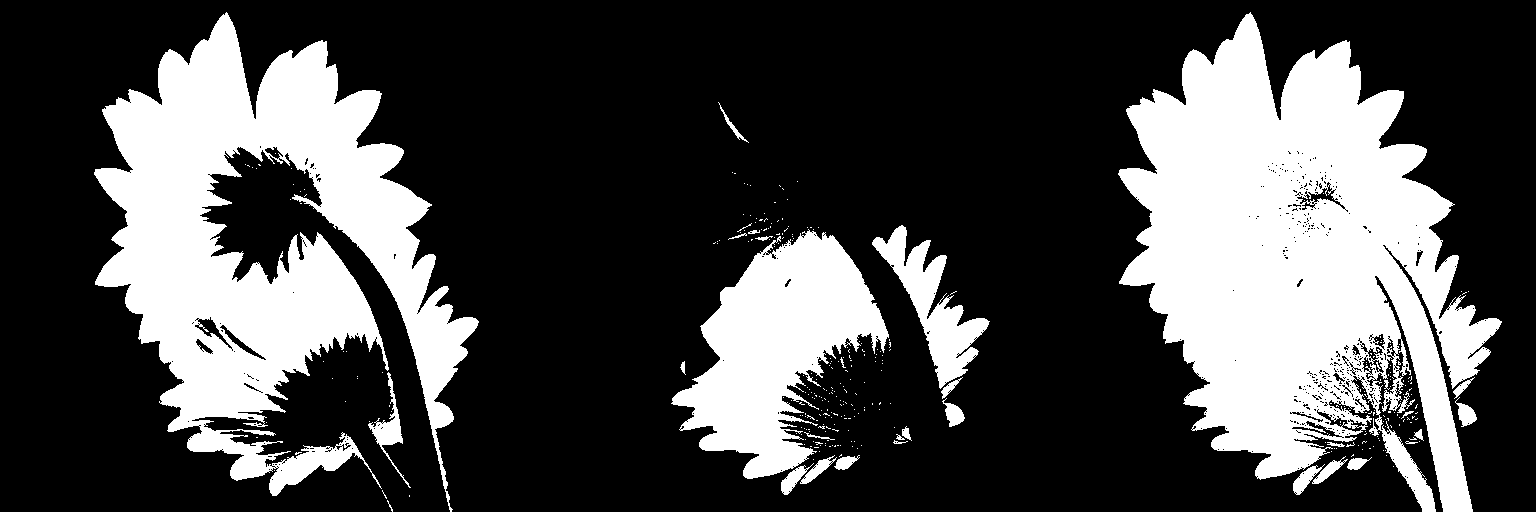

In [ ]:
Sr = R>150
Sg = G<40
Sb = B<40
Srgb = np.concatenate((Sr,Sg,Sb),axis=1)
cv2_imshow(Srgb*255)

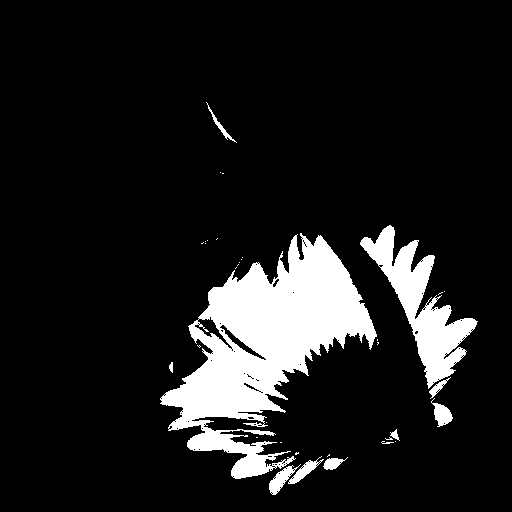

In [ ]:
Srg = np.logical_and(Sr,Sg)
S   = np.logical_and(Srg,Sb)
cv2_imshow(S*255)

# Removing isolated pixels

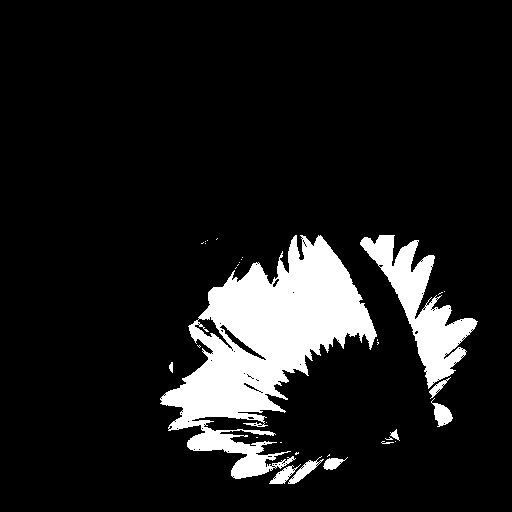

In [ ]:
(N,M) = S.shape
Q = S
for i in range(N):
  s = np.sum(S[i,:])
  if s<20:
    Q[i,:] = 0
cv2_imshow(Q*255)

# Searching (imin,jmin) and (imax,jmax) in the segmented region

In [ ]:
imin = 1000
imax = 0
jmin = 1000
jmax = 0
for i in range(N):
  for j in range(M):
    if Q[i,j]>0:
      if i<imin:
        imin = i
      if i>imax:
        imax = i
      if j<jmin:
        jmin = j
      if j>jmax:
        jmax = j

# Bounding Box

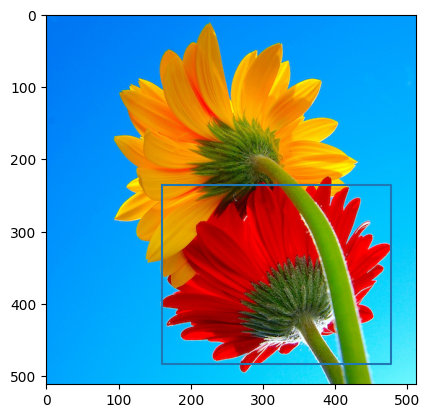

In [ ]:
y = [imin,imin,imax,imax,imin]
x = [jmin,jmax,jmax,jmin,jmin]
plt.imshow(I)
plt.plot(x,y)
plt.show()

# Edge detection

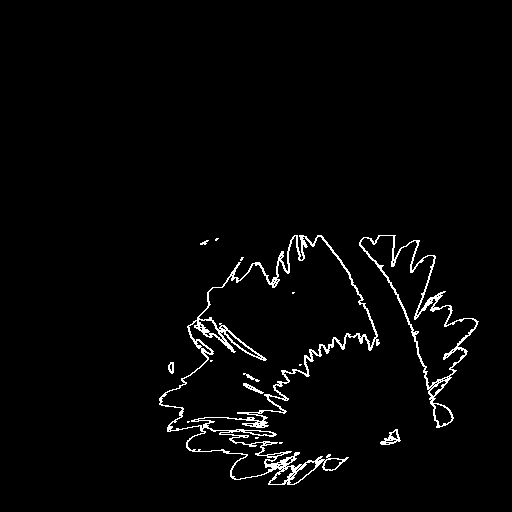

In [ ]:
E = np.zeros((N,M),np.uint8)
for i in range(N):
  for j in range(1,M):
    if Q[i,j]!=Q[i,j-1]:
      E[i,j]   = 1
      E[i,j-1] = 1
for i in range(1,N):
  for j in range(M):
    if Q[i-1,j]!=Q[i,j]:
      E[i,j]   = 1
      E[i,j-1] = 1
cv2_imshow(E*255)


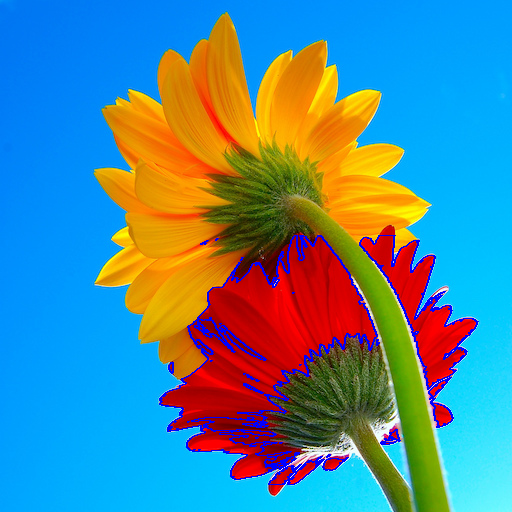

In [ ]:
for i in range(N):
  for j in range(M):
    if E[i,j]==1:
      Icv[i,j,:] = [255,0,0]
cv2_imshow(Icv)